<a href="https://colab.research.google.com/github/TongkaiYang/Vision-Zero-Madison/blob/Siyuan/VisionZero10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import datetime as dt
sns.set(style="white")
import warnings
warnings.filterwarnings('ignore')

In [0]:
raw_df = pd.read_csv('drive/My Drive/CS 638/Madison_crash_2009_2019.csv')
raw_cp = raw_df


In [31]:
#change default ACCDDATE to YEAR only
raw_cp['ACCDDATE'] = pd.to_datetime(raw_cp['ACCDDATE'])
ACCDYEAR = [x.year for x in raw_cp['ACCDDATE']]
raw_cp['ACCDYEAR'] = ACCDYEAR

#prepare for the streetlight plot
totalDarkAcc = raw_cp.groupby(['ACCDYEAR','LGTCOND']).count()['DOCTNMBR'].reset_index()
totalDarkAcc = totalDarkAcc[totalDarkAcc.LGTCOND == 'DARK']
totalDarkAcc = totalDarkAcc['DOCTNMBR'].repeat(2)[:20].reset_index()

#prepare for the bikepedestrian plot
totalAcc = raw_cp.groupby(['ACCDYEAR']).count()['DOCTNMBR'].reset_index()
totalAcc = totalAcc['DOCTNMBR'].repeat(2)[:20].reset_index()

totalDarkAcc

,index,DOCTNMBR
0,0,205
1,0,205
2,5,210
3,5,210
4,10,178
5,10,178
6,15,188
7,15,188
8,20,230
9,20,230


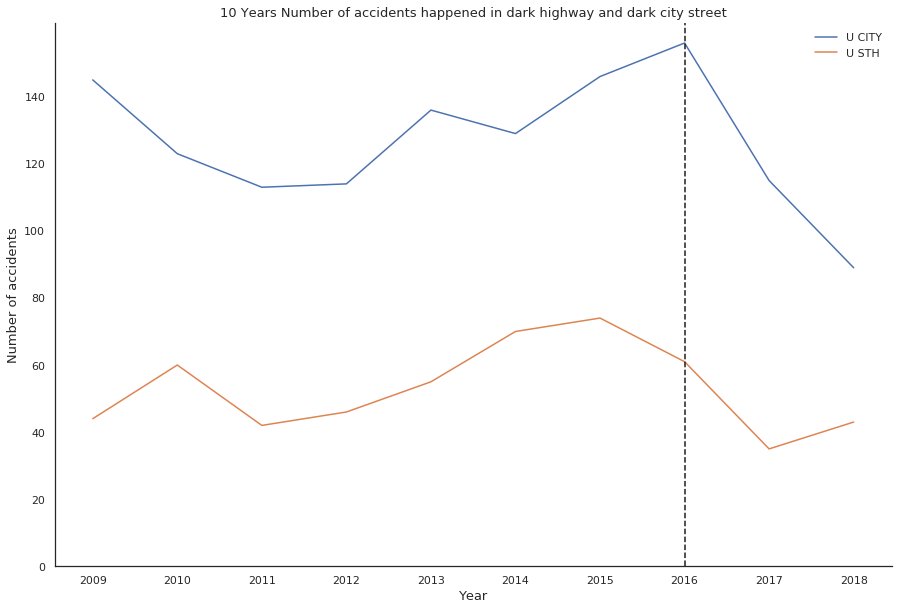

In [37]:
plt.figure(figsize = (15, 10))

Road_Lamp = raw_cp[((raw_df.HWYCLASS == 'U CITY') | (raw_df.HWYCLASS == 'U STH')) & (raw_df.LGTCOND == 'DARK')]
Road_Lamp_final = Road_Lamp.groupby(['ACCDYEAR','HWYCLASS','LGTCOND']).count()['DOCTNMBR'].reset_index()
Road_Lamp_final = Road_Lamp_final[Road_Lamp_final.ACCDYEAR!=2019]
Road_Lamp_plt = sns.lineplot(x = 'ACCDYEAR', y = 'DOCTNMBR', data = Road_Lamp_final, hue = 'HWYCLASS')
Road_Lamp_leg = Road_Lamp_plt.get_legend_handles_labels()[0]
Road_Lamp_final['RATIO'] = round(Road_Lamp_final['DOCTNMBR']/totalDarkAcc['DOCTNMBR']*100,3)

#Road_Lamp_leg
Road_Lamp_plt.legend(handles = Road_Lamp_leg[1:], labels = Road_Lamp_plt.get_legend_handles_labels()[1][1:], frameon=False, loc='upper right')
Road_Lamp_plt.spines['right'].set_visible(False)
Road_Lamp_plt.spines['top'].set_visible(False)
Road_Lamp_plt.set_title('10 Years Number of accidents happened in dark highway and dark city street', fontsize = 13)
Road_Lamp_plt.set_xlabel('Year', fontsize = 13)
Road_Lamp_plt.set_ylabel('Number of accidents', fontsize = 13)
Road_Lamp_plt.yaxis.set_ticks(np.arange(0, 160, 20))
Road_Lamp_plt.set_xticks(range(2009, 2019, 1))
plt.axvline(x=2016,color='k', linestyle='--')

In general, the annul car accidents happended in dark city streets are more than the car accidents happended in dark highway. The difference might be explained by the facts that there are much more city streets than highway in downtown Madison. Moreover, there is a clear pattern that after 2016, the total accidents happened in the no-light condition have decreased. I thought the pattern can be related with increasing street lights installation on city streets in recent years.

Text(0, 0.5, 'ratio of accidents to the total of each year(%)')

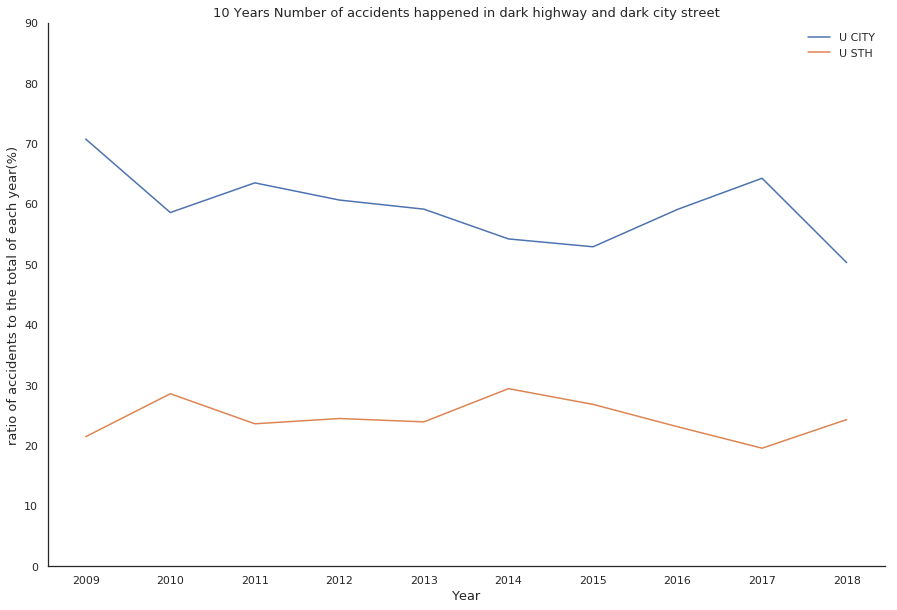

In [41]:
plt.figure(figsize = (15, 10))
Road_Lamp_plt = sns.lineplot(x = 'ACCDYEAR', y = 'RATIO', data = Road_Lamp_final, hue = 'HWYCLASS')
Road_Lamp_leg = Road_Lamp_plt.get_legend_handles_labels()[0]
Road_Lamp_plt.legend(handles =Road_Lamp_leg[1:], labels = Road_Lamp_plt.get_legend_handles_labels()[1][1:], frameon=False, loc='upper right')
Road_Lamp_plt.spines['right'].set_visible(False)
Road_Lamp_plt.spines['top'].set_visible(False)
Road_Lamp_plt.yaxis.set_ticks(np.arange(0, 100, 10))
Road_Lamp_plt.set_xticks(range(2009, 2019, 1))
Road_Lamp_plt.set_title('10 Years Number of accidents happened in dark highway and dark city street', fontsize = 13)
Road_Lamp_plt.set_xlabel('Year', fontsize = 13)
Road_Lamp_plt.set_ylabel('ratio of accidents to the total of each year(%)', fontsize = 13)

I've also plotted the ratio of accidents in both condition to the total accidents happened in dark light condition. Both lines are more flat than the above plot, which indicates again that the rate of accidents happned in dark highway is lower than that of city streets.

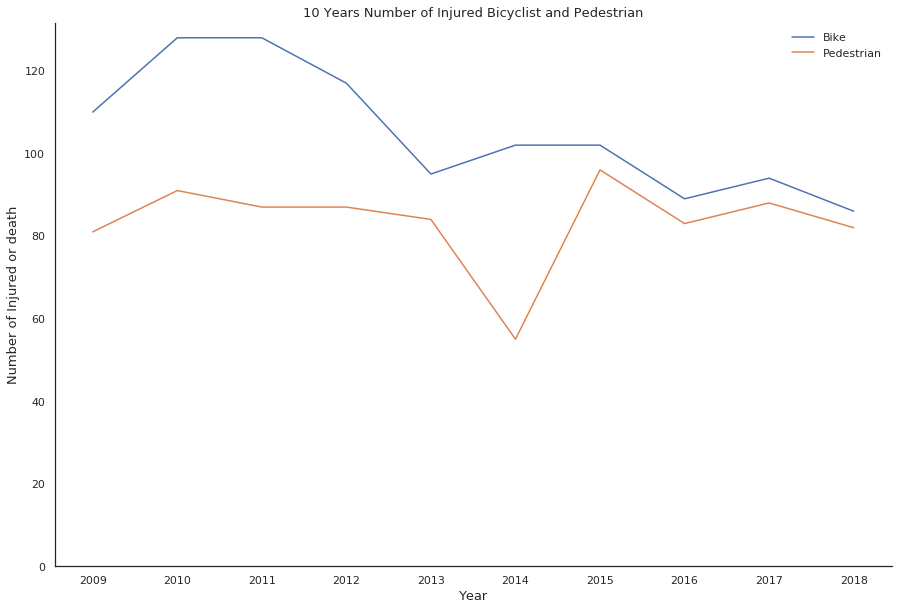

In [17]:


plt.figure(figsize = (15, 10))
#Bike and pedestrian injured accident
Bike_Ped_inj = raw_cp[((raw_df.ACCDSVR == 'FAT') | (raw_df.ACCDSVR == 'INJ')) & ((raw_df.BIKEFLAG == 'Y') | (raw_df.PEDFLAG == 'Y'))]
BIKE_PED_FLAG = ['Bike' if x == 'Y' else 'Pedestrian' for x in Bike_Ped_inj['BIKEFLAG']]
Bike_Ped_inj['BIKE_PED_FLAG'] = BIKE_PED_FLAG
Bike_Ped_final = Bike_Ped_inj.groupby(['ACCDYEAR', 'BIKE_PED_FLAG']).count()['DOCTNMBR'].reset_index()
Bike_Ped_final = Bike_Ped_final[Bike_Ped_final.ACCDYEAR!=2019]
Bike_Ped_final['RATIO'] = round(Bike_Ped_final['DOCTNMBR']/totalAcc['DOCTNMBR']*100,3)




Bike_Ped_plt = sns.lineplot(x = 'ACCDYEAR', y = 'DOCTNMBR', data = Bike_Ped_final, hue = 'BIKE_PED_FLAG')
Bike_Ped_leg = Bike_Ped_plt.get_legend_handles_labels()[0]

#Bike_Ped_leg
Bike_Ped_plt.legend(handles = Bike_Ped_leg[1:], labels = Bike_Ped_plt.get_legend_handles_labels()[1][1:], frameon=False, loc='upper right')
#px.line(Bike_Ped_final, x='ACCDYEAR', y='DOCTNMBR', color = 'BIKE_PED_FLAG', title = '10 Years Number of Injured bike and pedestrian')
Bike_Ped_plt.spines['right'].set_visible(False)
Bike_Ped_plt.spines['top'].set_visible(False)
Bike_Ped_plt.set_title('10 Years Number of Injured Bicyclist and Pedestrian', fontsize = 13)
Bike_Ped_plt.set_xlabel('Year', fontsize = 13)
Bike_Ped_plt.set_ylabel('Number of Injured or death', fontsize = 13)
Bike_Ped_plt.yaxis.set_ticks(np.arange(0, 130, 20))
Bike_Ped_plt.set_xticks(range(2009, 2019, 1))

The plot above is a revision of my last week plot, which shows that the number of injured or death relates with bikes are larger than that of pedestrians. It might be the fact that bikes are more colose to the vehicle line. Moreover, there is a clear trend that the total number of accidents relating with bikes or pedestrians has been decreased within ten years. As for the inverted triangle shape line associated with pedestrians, I don't think there is anything special about that year, given the difference between accidents of 2014(pedestrain) to other years is about 20, which is not big enough to capture our attention; 

Text(0, 0.5, 'ratio of injured or death to the total of each year(%)')

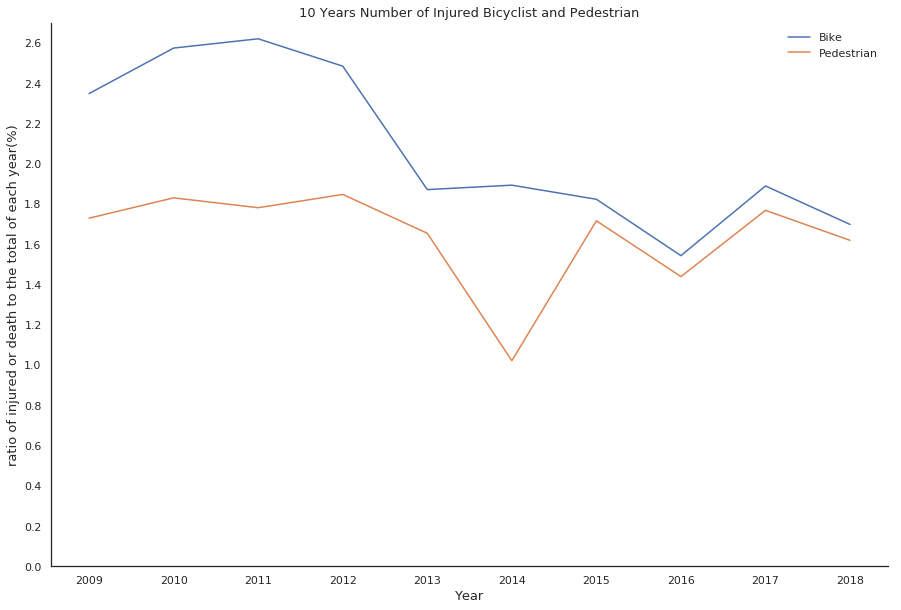

In [42]:
plt.figure(figsize = (15, 10))
Bike_Ped_plt = sns.lineplot(x = 'ACCDYEAR', y = 'RATIO', data = Bike_Ped_final, hue = 'BIKE_PED_FLAG')
Bike_Ped_leg = Bike_Ped_plt.get_legend_handles_labels()[0]
Bike_Ped_plt.legend(handles = Bike_Ped_leg[1:], labels = Bike_Ped_plt.get_legend_handles_labels()[1][1:], frameon=False, loc='upper right')
Bike_Ped_plt.spines['right'].set_visible(False)
Bike_Ped_plt.spines['top'].set_visible(False)
Bike_Ped_plt.yaxis.set_ticks(np.arange(0, 2.8, 0.2))
Bike_Ped_plt.set_xticks(range(2009, 2019, 1))
Bike_Ped_plt.set_title('10 Years Number of Injured Bicyclist and Pedestrian', fontsize = 13)
Bike_Ped_plt.set_xlabel('Year', fontsize = 13)
Bike_Ped_plt.set_ylabel('ratio of injured or death to the total of each year(%)', fontsize = 13)

In [0]:
Bike_Ped_plt.get_xticks()

array([2008., 2010., 2012., 2014., 2016., 2018., 2020.])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

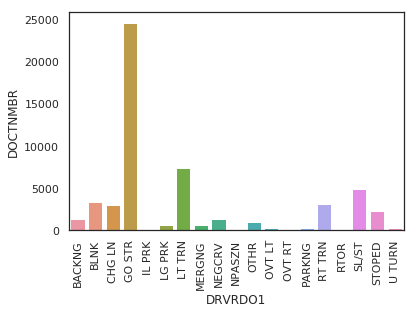

In [0]:
df_drdo = raw_df.dropna(subset=['DRVRDO1']).groupby(['DRVRDO1']).count()['DOCTNMBR'].reset_index()
drdo_plt = sns.barplot(x = 'DRVRDO1', y = 'DOCTNMBR', data = df_drdo)
plt.xticks(rotation = 90)